# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,precision_score
import re
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier

#  Loading Datasets

In [2]:
data_fake=pd.read_csv("F:/PROJECT/Fake.csv")
data_true=pd.read_csv("F:/PROJECT/True.csv")

In [3]:
data_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [4]:
data_fake.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [5]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:

data_fake['class']=0
data_fake

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [7]:
data_fake.tail()

,title,text,subject,date,class
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


#  Creating Dataset for Model Building

In [8]:
data_true['class']=1
data_true

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [9]:
data_fake.shape,data_true.shape

((23481, 5), (21417, 5))

In [10]:
data_fake_manual_testing=data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis=0,inplace=True)
    
    
data_true_manual_testing=data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis=0,inplace=True)

In [11]:
data_fake.shape,data_true.shape

((23471, 5), (21407, 5))

In [12]:
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1396\1676563180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1396\1676563180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [13]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [14]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [15]:
data_merge=pd.concat([data_fake,data_true],axis=0)
data_merge

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",1
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",1
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,worldnews,"August 22, 2017",1
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",1


In [16]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [17]:
data=data_merge.drop(['title','subject','date'],axis=1)                                                      

In [18]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [19]:
data=data.sample(frac=1)  #randomly picking data in 1D

In [20]:
data.head()

,text,class
19430,"Feldman operates Upstate Fish, a market at 826...",0
1090,A horrifying incident took place in the early ...,0
19089,JERUSALEM (Reuters) - Prime Minister Benjamin ...,1
18018,JERUSALEM (Reuters) - The Israeli military sai...,1
2359,WASHINGTON (Reuters) - Sean Spicer still plans...,1


In [21]:
data.to_csv('datas')

In [22]:
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

#  EDA

In [23]:
data.columns

Index(['text', 'class'], dtype='object')

In [24]:
data.head()

,text,class
0,"Feldman operates Upstate Fish, a market at 826...",0
1,A horrifying incident took place in the early ...,0
2,JERUSALEM (Reuters) - Prime Minister Benjamin ...,1
3,JERUSALEM (Reuters) - The Israeli military sai...,1
4,WASHINGTON (Reuters) - Sean Spicer still plans...,1


In [25]:
data.shape

(44878, 2)

In [26]:
data.describe()

,class
count,44878.000000
mean,0.477004
std,0.499476
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [27]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44878 entries, 0 to 44877
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44878 non-null  object
 1   class   44878 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.3+ KB


#  Preprocessing Text Data

In [29]:
def wordopt(text): #creating function to process text
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [30]:
data['text']=data['text'].apply(wordopt)

#  Data Visualization

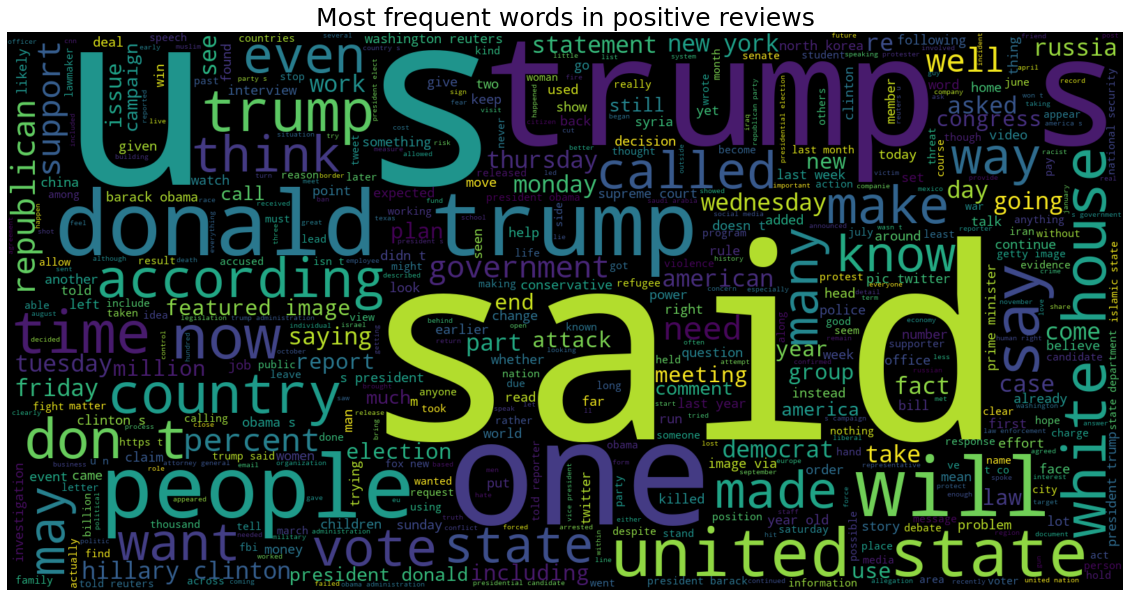

In [31]:

text=' '.join([word for word in data['text']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize=25)
plt.show()

#  Data Splitting

In [32]:
x=data['text']
y=data['class']

In [33]:
x

0        feldman operates upstate fish  a market at  jo...
1        a horrifying incident took place in the early ...
2        jerusalem  reuters    prime minister benjamin ...
3        jerusalem  reuters    the israeli military sai...
4        washington  reuters    sean spicer still plans...
                               ...                        
44873    washington  reuters    u s  president elect do...
44874    tokyo  reuters    campaigning began on tuesday...
44875    washington  reuters    a coalition of  conserv...
44876     century wire says with the ongoing hysteria c...
44877    we are witnessing the slow death of political ...
Name: text, Length: 44878, dtype: object

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [35]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(33658,) (11220,) (33658,) (11220,)


#  NLP

In [36]:

vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train)
xv_test=vectorization.transform(x_test)

In [37]:
xv_train

<33658x94779 sparse matrix of type '<class 'numpy.float64'>'
	with 6888637 stored elements in Compressed Sparse Row format>

In [38]:
xv_train.shape

(33658, 94779)

In [39]:
xv_test.shape

(11220, 94779)

#  Model Building

### Logistic Regression 

In [40]:
LR=LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [41]:
pred_lr1=LR.predict(xv_test)
pred_lr1

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [42]:
pred_lr2=LR.predict(xv_train)
pred_lr2

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [43]:
LR_acc=LR.score(xv_test,y_test)
LR_acc

0.9867201426024955

In [44]:
print(classification_report(y_test,pred_lr1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5936
           1       0.99      0.99      0.99      5284

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### Decision Tree Classifier

In [45]:
DT=DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [46]:
pred_dt1=DT.predict(xv_test)
pred_dt1

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [47]:
pred_dt2=DT.predict(xv_train)
pred_dt2

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [48]:
DT_acc=accuracy_score(y_test,pred_dt1)
DT_acc

0.996078431372549

In [49]:
precision_score(y_test,pred_dt1)

0.9965883244882486

###  Gradient Boosting Classifier

In [50]:
GB=GradientBoostingClassifier()
GB.fit(xv_train,y_train)

GradientBoostingClassifier()

In [51]:
pred_gb=GB.predict(xv_test)
#pred_gb=GB.predict(xv_train)
pred_gb

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [52]:
y_test

7276     0
8515     0
16229    0
43213    1
43686    1
        ..
31075    0
15602    0
38422    1
19144    0
17099    1
Name: class, Length: 11220, dtype: int64

In [53]:
GB_acc=accuracy_score(y_test,pred_gb)
GB_acc

0.9968805704099821

In [54]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5936
           1       0.99      1.00      1.00      5284

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



### Random Forest Classifier 

In [55]:
RF=RandomForestClassifier(random_state=0)
RF.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [56]:
pred_rf=RF.predict(xv_test)

In [57]:
RF_acc=RF.score(xv_test,y_test)
RF_acc

0.990463458110517

In [58]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_rf))

[[5881   55]
 [  52 5232]]


## Performance Analysis on each model 

In [59]:
pt=[]
t=[]
for i in[LR,GB,RF,DT]:
    i.fit(xv_train,y_train)
    pt.append(round(accuracy_score(y_test,i.predict(xv_test))*100,2))
    t.append(round(accuracy_score(y_train,i.predict(xv_train))*100,2))
print(pt)
print(t)

[98.67, 99.65, 99.05, 99.58]
[99.16, 99.66, 100.0, 100.0]


# Prediction 

In [60]:
def output_label(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "True News"
    
def manual_testing(news):
    testing_news={"text":[news]}
    new_def_test=pd.DataFrame(testing_news)
    new_def_test["text"]=new_def_test["text"].apply(wordopt)
    new_x_test=new_def_test["text"]
    new_xv_test=vectorization.transform(new_x_test)
    pred_RF=RF.predict(new_xv_test)
    return print("\n Random Forest Classifier Prediction: {} ".format(output_label(pred_RF[0])))
                                                                                                    
                  
                                                                                                    
                                                                                                                                                                                             

In [ ]:
news=str(input())
manual_testing(news)

In [ ]:
news=str(input())
manual_testing(news)

In [ ]:
plt.figure(figsize=(9,6))
acc=[LR_acc*100,DT_acc*100,GB_acc*100,RF_acc*100]
alg=["Logistic Regression",'Decision Tree','Gradient boosting classifier','Random forrest']
plt.ylim(80,95)

sns.barplot(alg, acc,color='green')
plt.xticks(rotation='vertical')

plt.xlabel('classification algorithms', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.title("Accuracy Comparison of algorithms")
plt.show()